<a href="https://colab.research.google.com/github/20MAI0028/Deep-Learning-Assignments/blob/main/RNN_with_LSTM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
import time

In [20]:
input_file="/content/drive/MyDrive/Dataset/DIS.csv"

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

np.random.seed(5)
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

all_y = df[5].values
dataset=all_y.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

look_back = 240
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
model = Sequential()
model.add(LSTM(25, input_shape=(1, look_back)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=240, verbose=1)
model.summary()

Epoch 1/1000
10/10 [==============================] - 1s 3ms/step - loss: 0.0136
Epoch 2/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 3/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 4/1000
10/10 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 5/1000
10/10 [==============================] - 0s 3ms/step - loss: 9.2469e-04
Epoch 6/1000
10/10 [==============================] - 0s 3ms/step - loss: 7.3853e-04
Epoch 7/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.5855e-04
Epoch 8/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.0825e-04
Epoch 9/1000
10/10 [==============================] - 0s 3ms/step - loss: 6.0490e-04
Epoch 10/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.1976e-04
Epoch 11/1000
10/10 [==============================] - 0s 3ms/step - loss: 5.2519e-04
Epoch 12/1000
10/10 [==============================] - 0s 3ms/step - loss: 4.70

In [16]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [23]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 27369892.24 RMSE
Test Score: 5121.32 RMSE


In [24]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [25]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

testPrices:
testPredictions:
[[3014.7114]
 [3044.5327]
 [3064.9653]
 ...
 [7584.0317]
 [7567.223 ]
 [7517.828 ]]


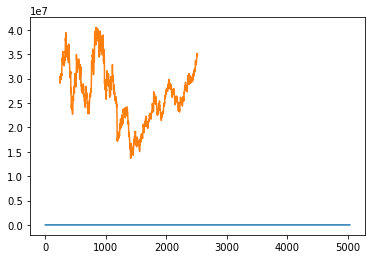

In [26]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
print('testPrices:')
testPrices=scaler.inverse_transform(dataset[test_size+look_back:])

print('testPredictions:')
print(testPredict)

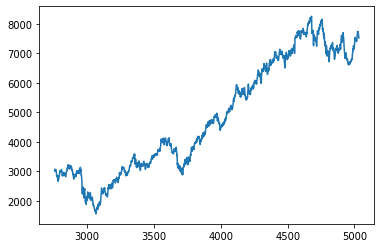

In [27]:
df = pd.DataFrame(data={"prediction": np.around(list(testPredict.reshape(-1)), decimals=2), "test_price": np.around(list(testPrices.reshape(-1)), decimals=2)})
df.to_csv("lstm_result.csv", sep=';', index=None)

plt.plot(testPredictPlot)
plt.show()